In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data 
import yfinance as yf

In [2]:
start = '2013-01-01'
end = '2023-12-31'

df = yf.download('AAPL', start=start, end=end)
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725040  560518000
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513933  352965200
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053936  594333600
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959502  484156400
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002453  458707200


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.725040,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.513933,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.053936,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,15.959502,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.002453,458707200


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


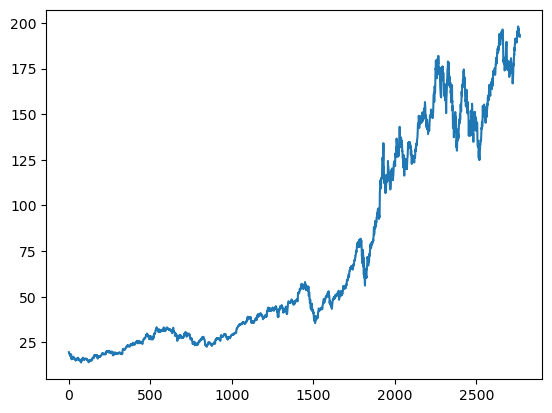

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200
...,...,...,...,...,...
2763,195.179993,195.410004,192.970001,193.600006,37122800
2764,193.610001,193.889999,192.830002,193.050003,28919300
2765,192.490005,193.500000,191.089996,193.149994,48087700
2766,194.139999,194.660004,193.169998,193.580002,34049900


In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    181.768301
2764    181.787101
2765    181.898701
2766    182.046001
2767    182.173301
Name: Close, Length: 2768, dtype: float64

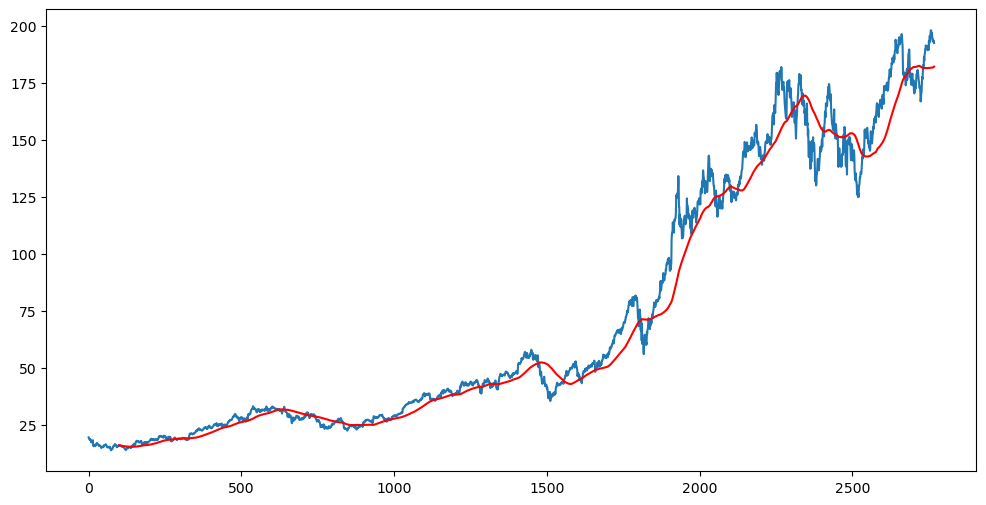

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    178.649100
2764    178.871851
2765    179.085250
2766    179.290201
2767    179.487900
Name: Close, Length: 2768, dtype: float64

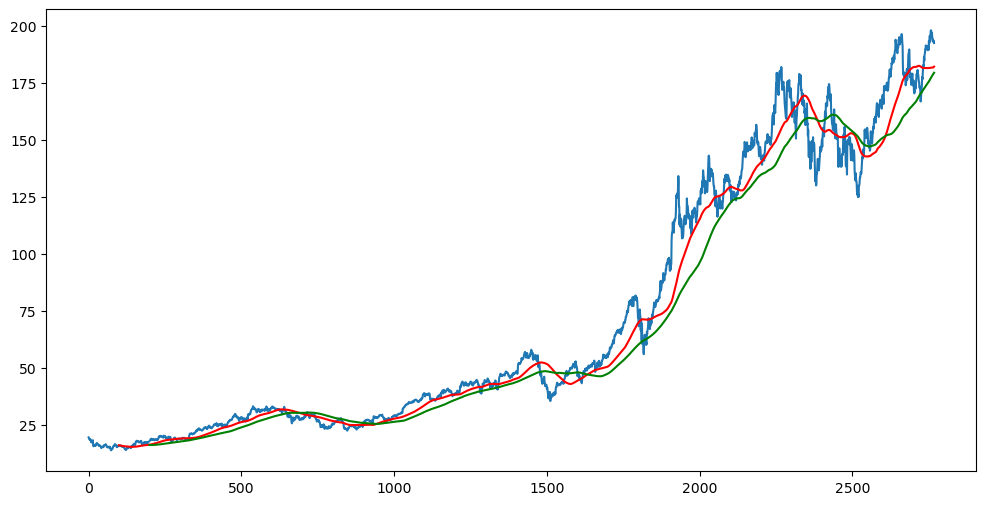

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2768, 5)

In [13]:
# Spliting data into training and testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [14]:
data_training.head()

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


In [15]:
data_testing.head()

,Close
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.04708139],
       [0.04502289],
       [0.04053753],
       ...,
       [0.82234426],
       [0.85977174],
       [0.82791678]])

In [19]:
data_training_array.shape

(1937, 1)

In [21]:
X_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

X_train, y_train = np.array(X_train),np.array(y_train)

In [22]:
# ML Model 

In [28]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [32]:
model = Sequential()
model.add(LSTM(units=50, activation= 'relu', return_sequences= True, 
               input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,y_train,epochs= 50)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - loss: 0.0345
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - loss: 0.0036
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 0.0030
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 0.0024
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 0.0026
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 0.0022
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0022
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0021
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.0026
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 0.0014
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 0.0026
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0019
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0017
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0020
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - l

In [35]:
model.save('keras_model.h5')

In [36]:
data_testing.head()

,Close
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996


In [41]:
past_100_days=data_training.tail(100)
past_100_days

,Close
1837,67.092499
1838,69.025002
1839,68.757500
1840,70.742500
1841,70.792503
...,...
1932,120.879997
1933,120.959999
1934,112.820000
1935,117.320000


In [75]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [76]:
final_df

,Close
0,67.092499
1,69.025002
2,68.757500
3,70.742500
4,70.792503
...,...
926,193.600006
927,193.050003
928,193.149994
929,193.580002


In [77]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01474996],
       [0.01270823],
       [0.02785889],
       [0.02824054],
       [0.01948211],
       [0.03694166],
       [0.04852404],
       [0.03949856],
       [0.04730286],
       [0.05569867],
       [0.06155668],
       [0.06749097],
       [0.07968403],
       [0.08899577],
       [0.08212645],
       [0.07495182],
       [0.07855823],
       [0.0750663 ],
       [0.08890033],
       [0.08542756],
       [0.09704813],
       [0.09250675],
       [0.09639937],
       [0.09227778],
       [0.09491097],
       [0.09517813],
       [0.09458661],
       [0.10204746],
       [0.10489057],
       [0.10828706],
       [0.10294429],
       [0.12046101],
       [0.12420096],
       [0.14429369],
       [0.16118076],
       [0.12885683],
       [0.13439043],
       [0.14238555],
       [0.15973055],
       [0.15879558],
       [0.15906275],
       [0.15522736],
       [0.17268685],
       [0.18730323],
       [0.17495755],
       [0.18407846],
       [0.162

In [78]:
input_data.shape

(931, 1)

In [79]:
X_test=[]
y_test=[]

for i in range (100, input_data.shape[0]):
    X_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [80]:
X_test,y_test=np.array(X_test),np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [81]:
# Making Predictions 

y_predicted = model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [82]:
y_predicted.shape

(831, 1)

In [83]:
y_test

array([0.34275956, 0.36840499, 0.36977886, 0.34375177, 0.33008947,
       0.30337548, 0.32810504, 0.34130935, 0.30551265, 0.31390846,
       0.34489667, 0.36535195, 0.3587116 , 0.37183963, 0.37931957,
       0.35054475, 0.37710612, 0.35161337, 0.36626788, 0.3654283 ,
       0.38069343, 0.43740342, 0.41221592, 0.41290288, 0.40923922,
       0.39634016, 0.37313721, 0.38481503, 0.37993019, 0.37138169,
       0.36596257, 0.36603892, 0.37786936, 0.33665348, 0.36809968,
       0.3187933 , 0.31810634, 0.33085277, 0.36527561, 0.3964165 ,
       0.39382146, 0.37573225, 0.37306086, 0.39992748, 0.39779037,
       0.39817202, 0.4061099 , 0.39916423, 0.38878394, 0.39343981,
       0.38351745, 0.3568798 , 0.36695479, 0.3735188 , 0.37779302,
       0.39656919, 0.4245807 , 0.42732843, 0.42625987, 0.42099338,
       0.43244223, 0.43725073, 0.41740607, 0.42854961, 0.42221462,
       0.41740607, 0.46396472, 0.46343044, 0.47022342, 0.45465304,
       0.46663611, 0.49449505, 0.4874731 , 0.49518195, 0.53120

In [84]:
y_predicted

array([[0.4671662 ],
       [0.4559148 ],
       [0.44174504],
       [0.4260232 ],
       [0.4097473 ],
       [0.3935846 ],
       [0.37773535],
       [0.36272505],
       [0.34923318],
       [0.337447  ],
       [0.32748938],
       [0.31980944],
       [0.31498507],
       [0.31313178],
       [0.3141895 ],
       [0.31804362],
       [0.3240134 ],
       [0.33155817],
       [0.3398107 ],
       [0.34810066],
       [0.35590744],
       [0.3630296 ],
       [0.37002122],
       [0.3771897 ],
       [0.38460708],
       [0.39210588],
       [0.39921024],
       [0.40503368],
       [0.40907246],
       [0.41109192],
       [0.41101   ],
       [0.40890533],
       [0.405048  ],
       [0.40003002],
       [0.39391017],
       [0.38720292],
       [0.37982202],
       [0.37170088],
       [0.3631404 ],
       [0.35500166],
       [0.3484699 ],
       [0.34446955],
       [0.34324604],
       [0.3445434 ],
       [0.34816414],
       [0.3537857 ],
       [0.36095235],
       [0.369

In [85]:
scaler.scale_

array([0.00763257])

In [86]:
scale_factor=1/0.00763257
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

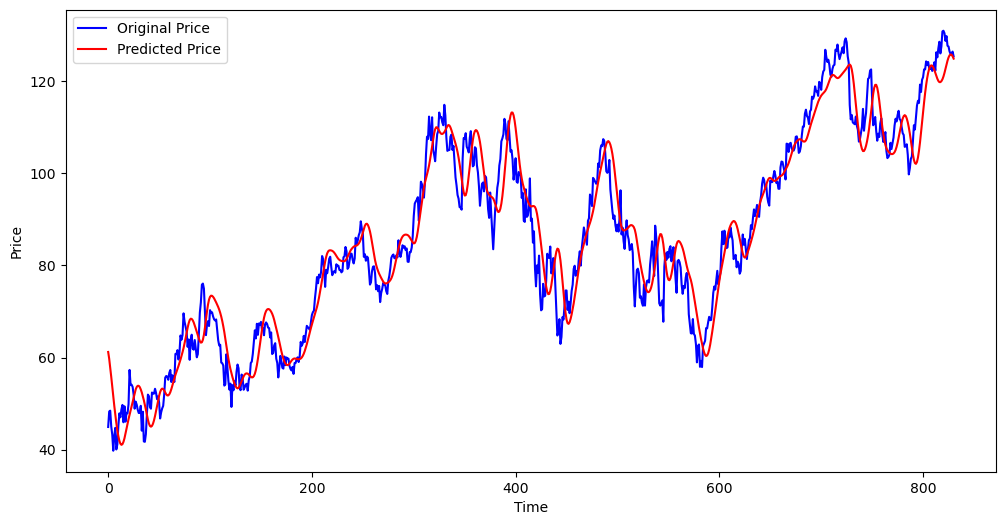

In [87]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
         